# Exercise 3.3: MLP basics with sklearn

Advanced Machine Learning for KCS

by Stefan Heinrich, Stella Grasshof, Laura Weihl
with material by Kevin Murphy

All info and static material: https://learnit.itu.dk/course/view.php?id=3021295

-------------------------------------------------------------------------------

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import neural_network
import seaborn as sns

#### Loading Iris dataset with seaborn


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


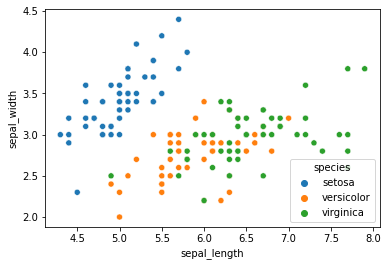

In [2]:
iris_df = sns.load_dataset("iris")

display(iris_df.head(n=3))

plot_raw = sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'],
                           hue=iris_df['species'])

#### Run logistic regression via sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


[[3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 ...
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]
 [3.8  3.82 3.84 ... 8.36 8.38 8.4 ]]
[[1.5  1.5  1.5  ... 1.5  1.5  1.5 ]
 [1.52 1.52 1.52 ... 1.52 1.52 1.52]
 [1.54 1.54 1.54 ... 1.54 1.54 1.54]
 ...
 [4.86 4.86 4.86 ... 4.86 4.86 4.86]
 [4.88 4.88 4.88 ... 4.88 4.88 4.88]
 [4.9  4.9  4.9  ... 4.9  4.9  4.9 ]]


D:\TeachingExt\github-itu-AML4DS2022-teaching\venvWin\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\stehe\AppData\Local\Temp\ipykernel_6728\2333979102.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot_rsk.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)


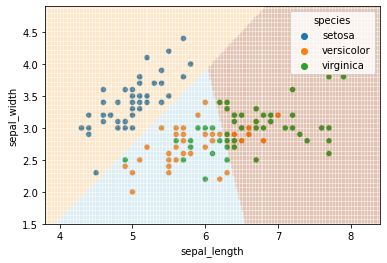

In [3]:
# Create an instance of Logistic Regression Classifier and fit the data.
r_strength = 100000  # Inverse of regularization strength in [1,Inf]
l_solver = 'newton-cg'  # Optimisation algorithm in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
m_class = 'multinomial'  # see documentation

logreg = LogisticRegression(C=r_strength, solver=l_solver,
                            multi_class=m_class)

# directly access iris_df['sepal_length'] and iris_df['sepal_width']
iris_df_inputs = iris_df[['sepal_length', 'sepal_width']]
display(iris_df.head(n=3))
# other options:
#iris_inputs = iris_df.values[:,:2]
#iris_inputs = iris_df.iloc[:,:2]

#convert 'species' from labels to ids
iris_classes = list(set(iris_df['species']))
iris_classes_dict = {iris_classes[k]: k for k in range(len(iris_classes))}
iris_species_ids = iris_df['species'].replace(iris_classes_dict)

# we only take the first two features
#logreg.fit(iris_data_inputs[:, :2], iris_data_targets_ids)
logreg.fit(iris_df_inputs, iris_species_ids)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = iris_df['sepal_length'].min() - .5, iris_df['sepal_length'].max() + .5
y_min, y_max = iris_df['sepal_width'].min() - .5, iris_df['sepal_width'].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx)
print(yy)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])  # this is not a clean way to do and will raise a warning (we only process values here, but trained with dataframes that had names), but for our purpose that's fine
Z = Z.reshape(xx.shape)

plot_rsk = sns.scatterplot(x=iris_df['sepal_length'], y=iris_df['sepal_width'],
                           hue=iris_df['species'], cmap=plt.cm.Paired)
plot_rsk.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)


#### Perform supervised training of an MLP via sklearn

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [4]:
n_datapoints = len(iris_df)
# here we define, which variables we want to use as input for learning
iris_df_inp = iris_df[
    ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_df_out = iris_df['species']

p_random_seed = 13
p_datasplit = 0.2  # how much percent of the data is used for testing
random.seed(p_random_seed)  # init the random generator with a seed

# for the split we use the sklearn model_selection module
iris_df_inp_train, iris_df_inp_test, iris_df_out_train, iris_df_out_test = model_selection.train_test_split(
    iris_df_inp, iris_df_out, test_size=p_datasplit,
    random_state=p_random_seed)
#display(iris_df_inp_train.head(n=3), iris_df_out_train.head(n=3))
#display(iris_df_inp_test.head(n=3), iris_df_out_test.head(n=3))

In [5]:
# parameters for the MLP shape
hidden_layer_sizes = (5, 4)  # tuple of sizes of hidden layers
activation ='relu'  # activation_fkt, {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

#parameters for the learning
solver = 'sgd'  # optimizer, {‘lbfgs’, ‘sgd’, ‘adam’}
learning_rate_init = 0.01  # learning_rate, try something smaller first!
learning_rate = 'constant'  # learning_rate_type, {‘constant’, ‘invscaling’, ‘adaptive’}
max_iter = 20  # epoches, number of training interations
batch_size = 1  # number of training examples per epoch
momentum = 0.95  # [0,1]

clf_mlp = neural_network.MLPClassifier(
    random_state=p_random_seed, solver=solver, activation=activation,
    hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init,
    max_iter=max_iter, learning_rate=learning_rate, momentum=momentum,
    batch_size=batch_size, nesterovs_momentum=True, alpha=1e-05,
    beta_1=0.9, beta_2=0.999, epsilon=1e-08, early_stopping=False,
    n_iter_no_change=10, power_t=0.5, tol=0.0001, validation_fraction=0.1,
    shuffle=True, verbose=False, warm_start=False)

clf_mlp.fit(iris_df_inp_train, iris_df_out_train)
test_accuracy = clf_mlp.score(iris_df_inp_test, iris_df_out_test)
print("Prediction accuracy:", test_accuracy)

## **uncomment this for iterative fitting (to see every epoch)
# for k in range(max_iter):
#     clf_mlp.partial_fit(iris_df_inp_train, iris_df_out_train,
#                     classes=list(set(iris_df['species'])))
#     test_accuracy = clf_mlp.score(iris_df_inp_test, iris_df_out_test)
#     print("Prediction epoch: ",k," accuracy:", test_accuracy)


Prediction accuracy: 0.3


#### Analyse the mlp training results

The following plots are examples for getting *some* understanding of the model performance.

              precision    recall  f1-score   support

      setosa       0.30      1.00      0.46         9
  versicolor       0.00      0.00      0.00         8
   virginica       0.00      0.00      0.00        13

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30



D:\TeachingExt\github-itu-AML4DS2022-teaching\venvWin\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\TeachingExt\github-itu-AML4DS2022-teaching\venvWin\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\TeachingExt\github-itu-AML4DS2022-teaching\venvWin\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(33.0, 0.5, 'true label')

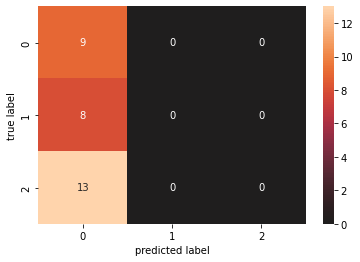

In [6]:
test_pred = clf_mlp.predict(iris_df_inp_test)
print(metrics.classification_report(iris_df_out_test, test_pred))

confusion_matrix = metrics.confusion_matrix(iris_df_out_test, test_pred)
plot_tree_cm = sns.heatmap(confusion_matrix, annot=True, center=0)
plot_tree_cm.set_xlabel('predicted label')
plot_tree_cm.set_ylabel('true label')

In [7]:
#plot the exact predictions
pred = clf_mlp.predict(iris_df_inp_test)
print("Prediction:", list(zip(*[pred, iris_df_out_test])))

proba = clf_mlp.predict_proba(iris_df_inp_test)
print("Prediction probabilities:", proba)

#plot the resulting weight matrix
print("Weights:", display([coef.shape for coef in clf_mlp.coefs_],  clf_mlp.coefs_))

Prediction: [('setosa', 'versicolor'), ('setosa', 'versicolor'), ('setosa', 'setosa'), ('setosa', 'virginica'), ('setosa', 'virginica'), ('setosa', 'setosa'), ('setosa', 'virginica'), ('setosa', 'virginica'), ('setosa', 'setosa'), ('setosa', 'versicolor'), ('setosa', 'virginica'), ('setosa', 'virginica'), ('setosa', 'versicolor'), ('setosa', 'setosa'), ('setosa', 'virginica'), ('setosa', 'setosa'), ('setosa', 'virginica'), ('setosa', 'virginica'), ('setosa', 'versicolor'), ('setosa', 'setosa'), ('setosa', 'versicolor'), ('setosa', 'setosa'), ('setosa', 'setosa'), ('setosa', 'virginica'), ('setosa', 'versicolor'), ('setosa', 'virginica'), ('setosa', 'setosa'), ('setosa', 'virginica'), ('setosa', 'versicolor'), ('setosa', 'virginica')]
Prediction probabilities: [[0.39257712 0.3140785  0.29334438]
 [0.39257712 0.3140785  0.29334438]
 [0.39257712 0.3140785  0.29334438]
 [0.39257712 0.3140785  0.29334438]
 [0.39257712 0.3140785  0.29334438]
 [0.39257712 0.3140785  0.29334438]
 [0.39257712 0

[(4, 5), (5, 4), (4, 3)]

[array([[ 0.17064935, -0.4269661 ,  0.01732863,  0.47539536, -0.09973919],
        [-0.26844888,  0.17738951,  0.09826323,  0.15175422,  0.06396511],
        [-0.82628243, -0.32788099, -0.85801245,  0.23491115, -1.13826346],
        [ 0.28130907, -0.39648207, -0.26789792, -0.92331791, -0.56942421]]),
 array([[-0.70751743,  0.30272876,  0.3760615 , -0.7992178 ],
        [ 0.40113012,  0.50892782, -0.69021989,  0.25452044],
        [ 0.01506768,  0.15273932,  0.35419523, -0.81337692],
        [-0.41161328, -1.86159241, -1.07832686, -0.36278076],
        [ 0.31794929, -0.34850688, -0.95005778, -0.0681857 ]]),
 array([[-0.79702365,  0.34325437,  0.08902105],
        [-0.56670277, -0.89851668, -0.41204301],
        [-0.64058585,  0.78518389,  0.33110131],
        [-0.48391694,  0.12706642,  0.10446404]])]

Weights: None
